# INFO371 Lab: k-Nearest Neighbors

This lab asks you to:

* use $k$-nearest neighbors to categorize iris data
* use Cross-Validation to find the best metric and $k$

For hints about how to use cross-validation in python, see the following [tutorial](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85).

---
## Categorize Iris Flowers

Your main task is to categorize Iris flowers based on the four measurements (aka: features) into the correct species (aka: labels) setosa, virginica, and versicolor.  The data contains 50 flowers of each species (150 in total), and four measurements for each species (petal length and width, and sepal length and width).  All of these are numeric measures. 

Here are the different iris flowers with the features (sepal and petals marked):
![dataset description](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)


1. Download data the dataset from this [link](https://archive.ics.uci.edu/ml/datasets/Iris).  Make a consistency check to ensure it is loaded correctly. 
2. Split your data into a feature dataframe that only contains the attributes (i.e. the sepal and petal width and length), and the labels array that contains the species name. 
3. Graphical exploration.  Make a few scatterplots of the data using different attributes on axes, while depicting the species with different colors.

      Note: sklearn's implementaiton of $k$-means can easily handle string labels (like species' names) but plotting cannot.  If you are using matplotlib for plotting, it is useful to convert the string labels into numbers (for example, convert "setosa" to 1). You can also use the Seaborn library for plotting which has built in features to handle string data already. 


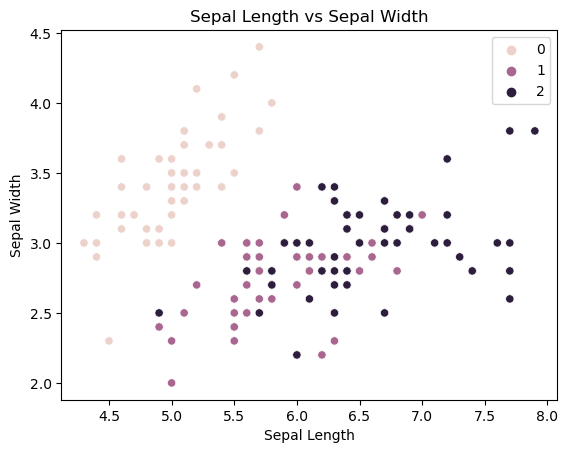

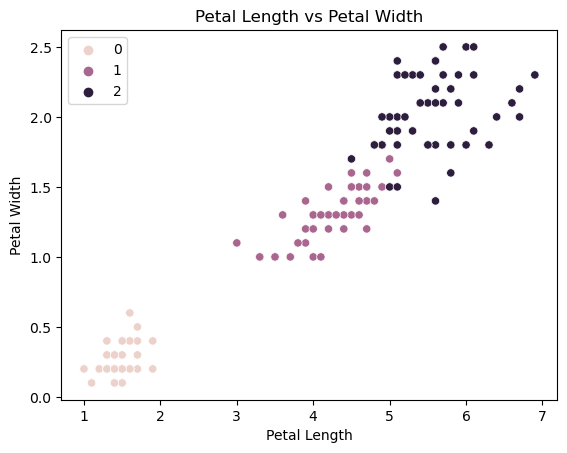

In [42]:
#this code is another option for getting access to the dataset:

from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

#in this version, iris['data'] returns the dataframe for the features
# iris['target'] returns the labels where 1 is 'setosa', 2 is 'versicolor', and 3 is 'virginica'

#otherwise, you'll need to download the dataset from this link: https://archive.ics.uci.edu/ml/datasets/Iris
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(iris.data)
sns.scatterplot(x=df[0], y=df[1], hue=iris.target, data=df)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

sns.scatterplot(x=df[2], y=df[3], hue=iris.target, data=df)
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

Now it is time to get into $k$-NN.  Your task is to predict and cross-validate a series of models over a range of $k$ values, and using four different metrics: Euclidean, Manhattan, Chebyshev and Mahalanobis. Note, you may find it helpful to check out sklearn's [documentation on disntace metrics](https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html) to get an idea of what each one does. 


4. Using the sklearn library, create a $k$-NN model using a single neighbor and Euclidean metric. 

5. Cross-validate (10-fold) the model using your feature set and labels.  Use accuracy as your score.  As a reminder, you'll need code like

```
cv = cross_val_score(m, X, y, cv=10)
np.mean(cv)
```

6. Repeat the steps you did with Manhattan, Chebyshev, and Mahalanobis metric.  

    Note: For the latter, you need to compute the data covariance matrix, and thereafter you have to create a $k$-NN model requesting Mahalanobis distance with that metric.  This can be done like so: 

```
Sigma = np.cov(X, rowvar=False)
m = KNeighborsClassifier(n_neighbors=3,
                         metric="mahalanobis",
                         metric_params={"V":Sigma})
```

7. Now repeat the above for $k=1,2,\dots,15$.  Each time print out the cross-validated accuracy score.  Which $k$ and which metric gives you the best accuracy? Why do you think that is the case -- explain your reasoning. Is there a difference distance metric you think would work better? 

In [47]:
#code goes here
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score


x_train, x_test, y_train, y_test = train_test_split(df, iris.target, test_size = 0.25)

m = KNeighborsClassifier(n_neighbors=1)
m.fit(x_train, y_train)
accuracy = cross_val_score(m, df, iris.target, scoring='accuracy', cv = 10)
np.mean(accuracy)

0.96

In [49]:
m = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
m.fit(x_train, y_train)
accuracy = cross_val_score(m, df, iris.target, scoring='accuracy', cv = 10)
np.mean(accuracy)

0.96

In [50]:
m = KNeighborsClassifier(n_neighbors=1, metric='chebyshev')
m.fit(x_train, y_train)
accuracy = cross_val_score(m, df, iris.target, scoring='accuracy', cv = 10)
np.mean(accuracy)

0.96

In [53]:
Sigma = np.cov(df, rowvar=False)
m = KNeighborsClassifier(n_neighbors=1,
                         metric="mahalanobis",
                         metric_params={"V":Sigma})
m.fit(x_train, y_train)
accuracy = cross_val_score(m, df, iris.target, scoring='accuracy', cv = 10)
np.mean(accuracy)

0.9

In [60]:
euc_best = []
man_best = []
cheb_best = []
mah_best = []
for k in range(1,16):

    m = KNeighborsClassifier(n_neighbors=k)
    m.fit(x_train, y_train)
    accuracy = cross_val_score(m, df, iris.target, scoring='accuracy', cv = 10)
    euc_best.append((np.mean(accuracy), k))
    
    m = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    m.fit(x_train, y_train)
    accuracy = cross_val_score(m, df, iris.target, scoring='accuracy', cv = 10)
    man_best.append((np.mean(accuracy), k))
    
    m = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    m.fit(x_train, y_train)
    accuracy = cross_val_score(m, df, iris.target, scoring='accuracy', cv = 10)
    cheb_best.append((np.mean(accuracy), k))
    
    Sigma = np.cov(df, rowvar=False)
    m = KNeighborsClassifier(n_neighbors=k,
                         metric="mahalanobis",
                         metric_params={"V":Sigma})
    m.fit(x_train, y_train)
    accuracy = cross_val_score(m, df, iris.target, scoring='accuracy', cv = 10)
    mah_best.append((np.mean(accuracy), k))

In [62]:
print('max euclidean score: ', max(euc_best))
print('max manhattan score: ', max(man_best))
print('max chebyshev score: ', max(cheb_best))
print('max mahalanobis score: ', max(mah_best))

max euclidean score:  (0.9800000000000001, 13)
max manhattan score:  (0.9733333333333334, 15)
max chebyshev score:  (0.9866666666666667, 11)
max mahalanobis score:  (0.9066666666666666, 3)


Based on the results of the experiment the chebyshev distance metric with a k values of 11 was the most accurate with a cross-validated score of .9866 when compared to the close euclidean and manhattan scores. unlike manhattan and euclidean which primarily deal in spacial domains chebyshev uses maximum difference. Mahalanobis was the poorest as it generally deals with distances as it relates to the distance from the mean value distribution of a set.